/home/cj/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


RMSE: 184.65562562628128
truth: 3144, predicted: 2942.4108987757604


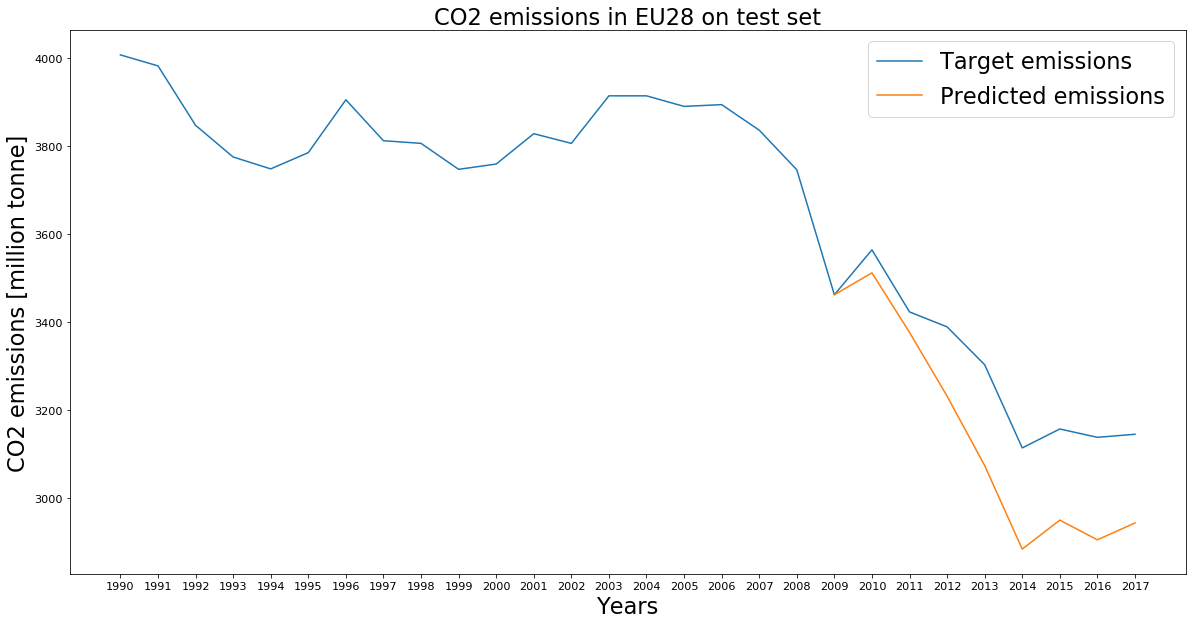

In [1]:
import math
import pandas as pd
import numpy as np
import pickle

import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

df1 = pd.read_csv('datasets/european_dataset_1.csv', index_col=0)
df2 = pd.read_csv('datasets/european_dataset_2.csv', index_col=0)

# Create train and validation sets

X = df1[['pop', 'gdp', 'gas_cons', 'oil_cons', 'coal_cons', 'total_cons']].to_numpy()
y = df1['fossil_emi'].to_numpy()

nbr_train = 20
y_train = y[:nbr_train]
y_val = y[nbr_train:]

X_train = X[:nbr_train, :]
X_val = X[nbr_train:, :]

# prepare model
model = make_pipeline(StandardScaler(), GridSearchCV(KernelRidge(kernel='rbf'), cv=5, iid=True,
                                                     param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                                                                 "gamma": np.logspace(-2, 2, 5)}))

fitted = model.fit(X_train, y_train)
filename = 'stdKR_model.pk'
pickle.dump(model, open(filename, 'wb'))

pred_X = fitted.predict(X)
pred_val = fitted.predict(X_val)

mse = mean_squared_error(y_val, pred_val)
print('RMSE: {}'.format(math.sqrt(mse)))
pred_val = np.insert(pred_val, 0, y_train[-1])
print('truth: {}, predicted: {}'.format(y[-1], pred_val[-1]))
# plot results
size = 15
params = {'legend.fontsize': size*1.5,
          'axes.titlesize': size*1.5,
          'axes.labelsize': size*1.5,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75}
matplotlib.rcParams.update(params)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df1.index, y, label='Target emissions')
ax.plot(np.arange((2018 - len(pred_val)), 2018), pred_val, label='Predicted emissions')

plt.xticks(np.arange(1990, 2018))
plt.xlabel('Years')
plt.ylabel('CO2 emissions [million tonne]')
plt.title('CO2 emissions in EU28 on test set')
plt.legend()
plt.savefig('kr_TS.png')
plt.show()
plt.close()